# GAN for Cybersecurity

In [1]:
# Import
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import sklearn

# Dataset pre-processing

In [2]:
# Import dataset
path_training = "Training and Testing Sets/UNSW_NB15_training-set.csv"
path_testing = "Training and Testing Sets/UNSW_NB15_testing-set.csv"
df_train = pd.read_csv(path_training)
df_test = pd.read_csv(path_testing)

print("Training set shape:", df_train.shape)
df_train.head()

Training set shape: (175341, 45)


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [3]:
print("Testing set shape:", df_test.shape)
df_test.head()

Testing set shape: (82332, 45)


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [4]:
# Convert categorical features to float
categorical_features = ['proto', 'service', 'state', 'attack_cat']
for feature in categorical_features:
    df_train[feature] = df_train[feature].astype('category').cat.codes
    df_test[feature] = df_test[feature].astype('category').cat.codes

# df shape
print("Training set shape after encoding:", df_train.shape)
print("Testing set shape after encoding:", df_test.shape)



Training set shape after encoding: (175341, 45)
Testing set shape after encoding: (82332, 45)


# Visualize Dataset repartition

Text(0.5, 1.0, 'Repartition of Normal and Anomalous Data in Training Set')

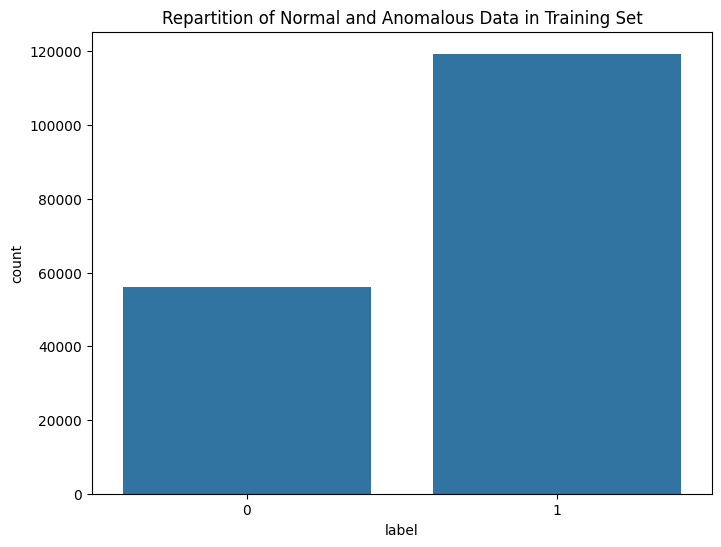

In [5]:
# Repartition of the dataset
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df_train)
plt.title('Repartition of Normal and Anomalous Data in Training Set')

In [6]:
# print number of features and min and max values
print("Number of features:", df_train.shape[1])
print("Min values:\n", df_train.min())
print("Max values:\n", df_train.max())

Number of features: 45
Min values:
 id                    1.0
dur                   0.0
proto                 0.0
service               0.0
state                 0.0
spkts                 1.0
dpkts                 0.0
sbytes               28.0
dbytes                0.0
rate                  0.0
sttl                  0.0
dttl                  0.0
sload                 0.0
dload                 0.0
sloss                 0.0
dloss                 0.0
sinpkt                0.0
dinpkt                0.0
sjit                  0.0
djit                  0.0
swin                  0.0
stcpb                 0.0
dtcpb                 0.0
dwin                  0.0
tcprtt                0.0
synack                0.0
ackdat                0.0
smean                28.0
dmean                 0.0
trans_depth           0.0
response_body_len     0.0
ct_srv_src            1.0
ct_state_ttl          0.0
ct_dst_ltm            1.0
ct_src_dport_ltm      1.0
ct_dst_sport_ltm      1.0
ct_dst_src_ltm        1.0
is

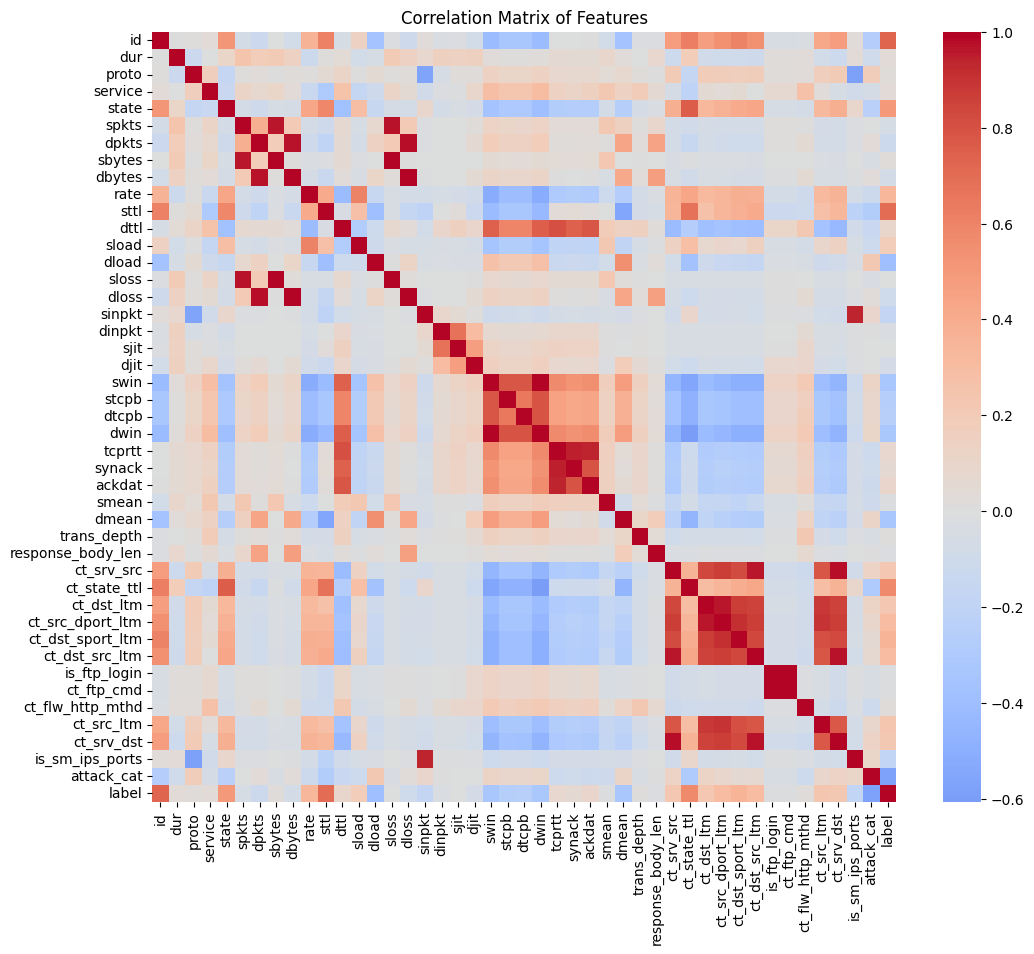

In [7]:
# correlation matrix for feature selection
corr_matrix = df_train.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Features')
plt.show()

In [8]:
# Determine important features
# Based on correlation with the label, we can select features with high absolute correlation values
important_features = corr_matrix['label'].abs().sort_values(ascending=False)
print("Important features based on correlation with label:\n", important_features)

# Select top N features (excluding the label itself)
N = 20
top_features = important_features.index[1:N+1].tolist()
print("Top {} features selected for training:\n".format(N), top_features)

# Prepare data for training
X_train = df_train[top_features]
y_train = df_train['label']
X_test = df_test[top_features]
y_test = df_test['label']
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Normalize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("X_train after scaling shape:", X_train.shape)
print("X_test after scaling shape:", X_test.shape)

Important features based on correlation with label:
 label                1.000000
id                   0.727173
sttl                 0.692741
attack_cat           0.580908
ct_state_ttl         0.577704
state                0.497685
dload                0.393739
ct_dst_sport_ltm     0.357213
dmean                0.341806
rate                 0.337979
swin                 0.333633
dwin                 0.319626
ct_src_dport_ltm     0.305579
ct_dst_src_ltm       0.303855
stcpb                0.255006
dtcpb                0.250340
ct_src_ltm           0.238225
ct_dst_ltm           0.229887
ct_srv_src           0.229044
ct_srv_dst           0.228046
is_sm_ips_ports      0.184679
sload                0.182870
sinpkt               0.176110
dpkts                0.118591
ackdat               0.097364
dttl                 0.095049
dloss                0.094685
tcprtt               0.081584
dbytes               0.076871
djit                 0.060870
synack               0.058299
spkts            

# PREPARE THE GAN

In [9]:
# Create a GAN model
import tensorflow as tf
from tensorflow.keras import layers, models
latent_dim = 32
def build_generator(latent_dim, output_dim):
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_dim=latent_dim))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(output_dim, activation='linear'))
    return model
def build_discriminator(input_dim):
    model = models.Sequential()
    model.add(layers.Dense(128, activation='relu', input_dim=input_dim))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

# PREPARE THE GAN
generator = build_generator(latent_dim, X_train.shape[1])
discriminator = build_discriminator(X_train.shape[1])
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
discriminator.trainable = False
gan_input = layers.Input(shape=(latent_dim,))
gan_output = discriminator(generator(gan_input))
gan = models.Model(gan_input, gan_output)
gan.compile(optimizer='adam', loss='binary_crossentropy')
print("Generator Summary:")
generator.summary()
print("Discriminator Summary:")
discriminator.summary()

C:\Users\phasi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Generator Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 20)             │         2,580 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,012 (50.83 KB)

 Trainable params: 13,012 (50.83 KB)

 Non-trainable params: 0 (0.00 B)

Discriminator Summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,009 (43.00 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 11,009 (43.00 KB)

In [ ]:
def train_gan(gan, generator, discriminator, X_train, latent_dim, epochs=100, batch_size=128):
    half_batch = batch_size // 2
    for epoch in range(epochs):
        # Train Discriminator
        discriminator.trainable = True
        idx = np.random.randint(0, X_train.shape[0], half_batch)
        real_data = X_train[idx]
        noise = np.random.normal(0, 1, (half_batch, latent_dim))
        fake_data = generator.predict(noise)
        d_loss_real = discriminator.train_on_batch(real_data, np.ones((half_batch, 1)))
        d_loss_fake = discriminator.train_on_batch(fake_data, np.zeros((half_batch, 1)))
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
        
        # Train Generator
        discriminator.trainable = False
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        valid_y = np.ones((batch_size, 1))
        g_loss = gan.train_on_batch(noise, valid_y)
        
        # Print progress
        if epoch % 10 == 0:
            print(f"{epoch} [D loss: {d_loss[0]:.4f}, acc.: {100*d_loss[1]:.2f}] [G loss: {g_loss:.4f}]")

train_gan(gan, generator, discriminator, X_train, latent_dim, epochs=100, batch_size=128)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
0 [D loss: 9.570901870727539, acc.: 34.81254577636719] [G loss: 0.0008609857759438455]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
10 [D loss: 9.573051452636719, acc.: 34.812652587890625] [G loss: 0.000860125757753849]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
20 [D loss: 9.5752067565917

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Generated Data Sample:
             id         sttl  attack_cat  ct_state_ttl     state       dload  \
0 -915067.6250  2709.509521  -34.706196     21.073517 -6.199516 -16171460.0   
1 -537209.4375  1721.155640  -19.838219     14.270435 -3.597489  -7338097.5   
2 -902002.2500  2540.679688  -32.437935     20.594736 -5.711426 -13535392.0   
3 -830002.4375  2531.646729  -33.091728     20.704861 -6.375704 -14756304.0   
4 -999950.5000  2949.329102  -39.457241     23.225119 -7.530529 -15892358.0   

   ct_dst_sport_ltm        dmean         rate         swin         dwin  \
0         78.768768 -2527.501465 -3115655.500 -2601.015381 -2458.955811   
1         47.358749 -1697.699951 -2002797.875 -1792.596191 -1578.310425   
2         72.541603 -2653.583252 -3063364.000 -2538.970947 -2345.573730   
3         65.392128 -2360.282227 -2836085.500 -2561.461914 -2361.707520   
4         80.144836 -2851.025635 -3608631.500 -3117.503418 -2797.461426   

   ct_src_

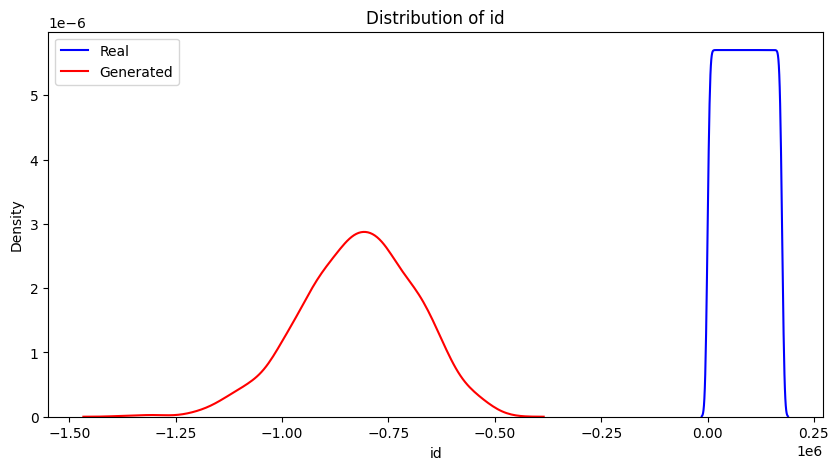

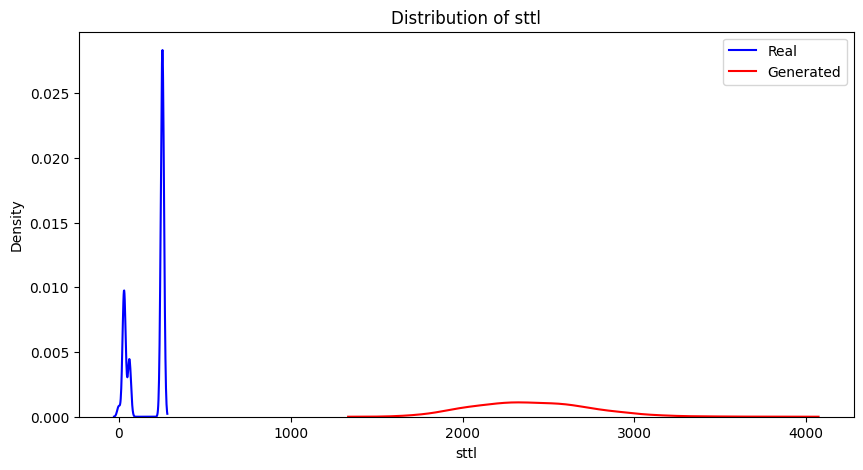

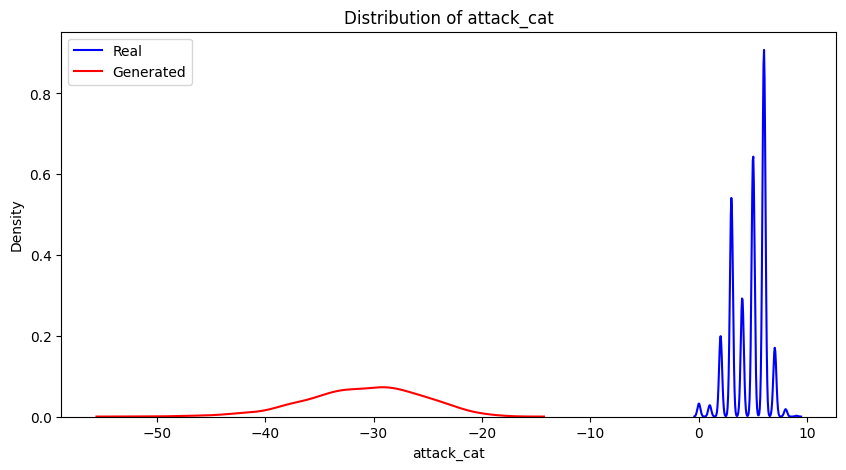

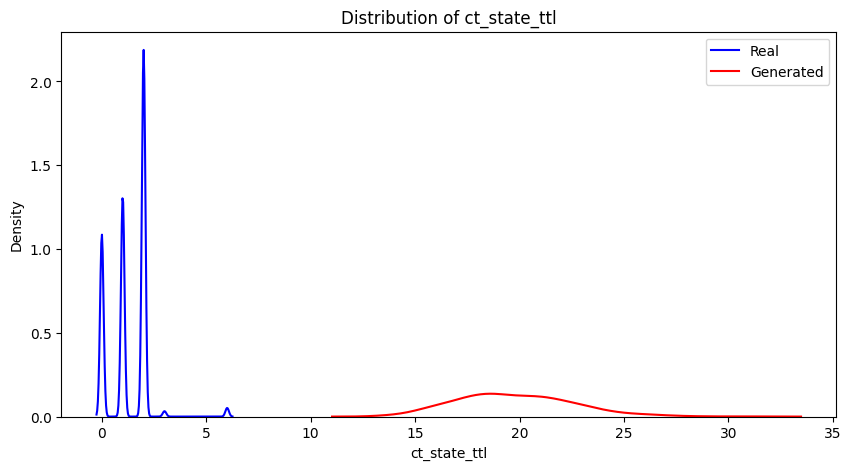

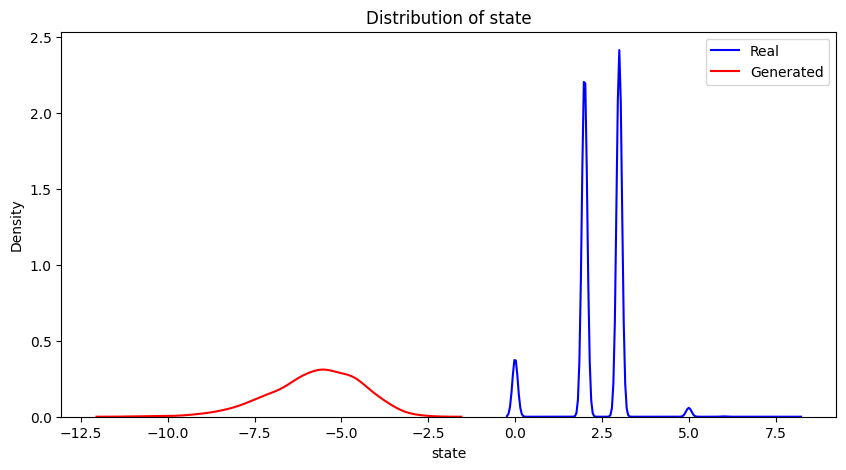

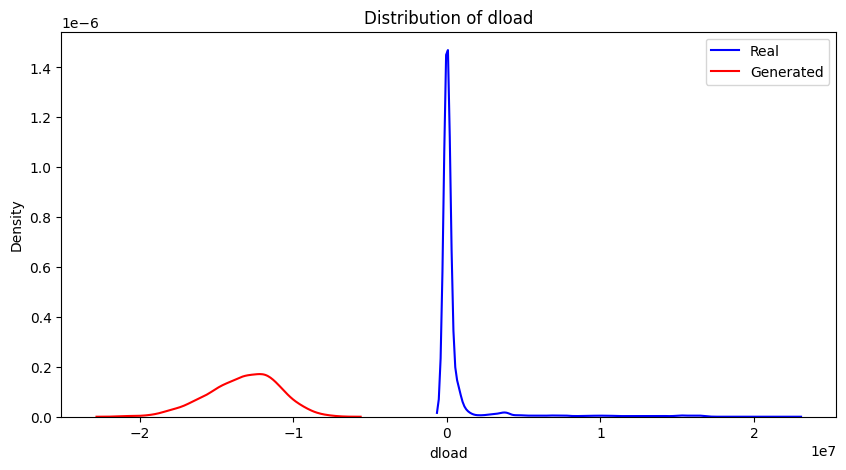

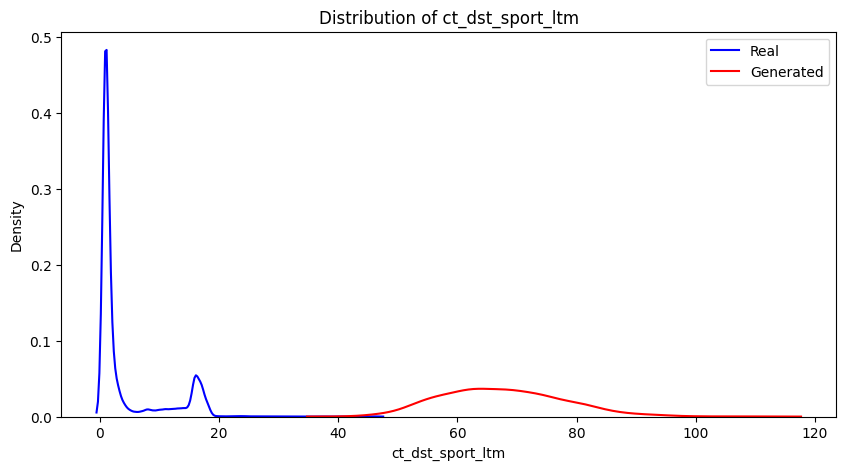

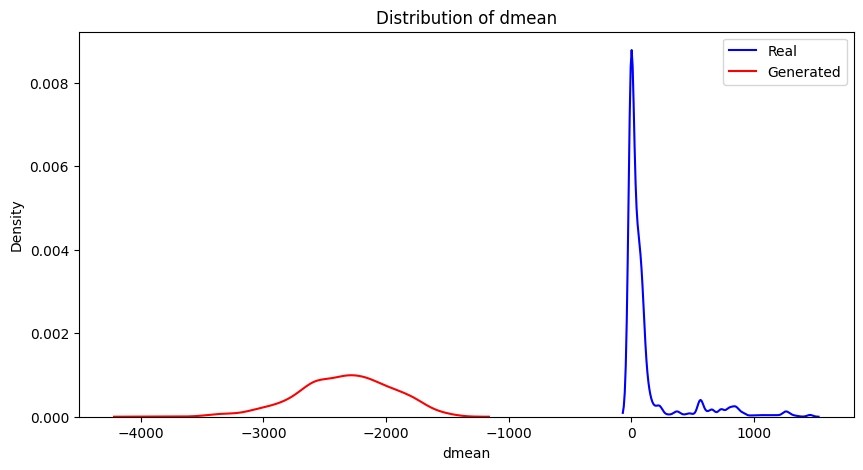

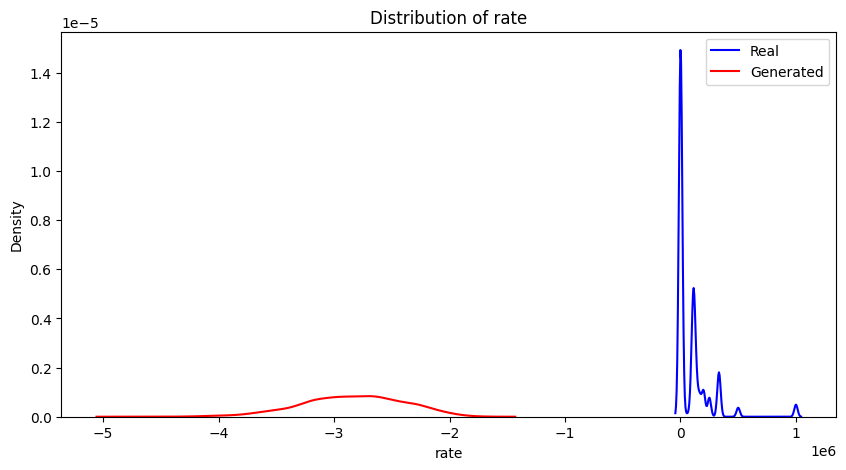

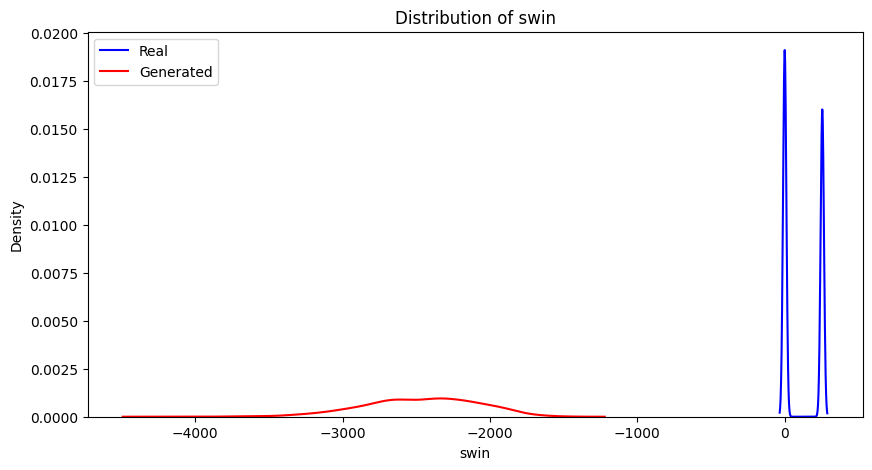

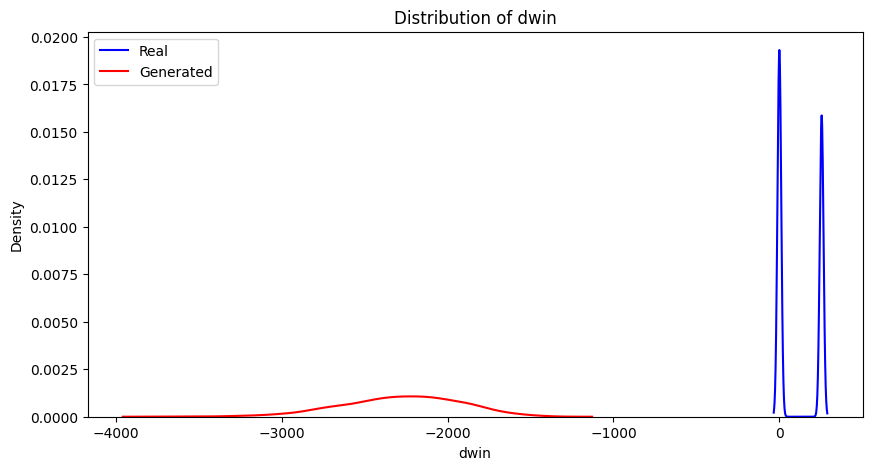

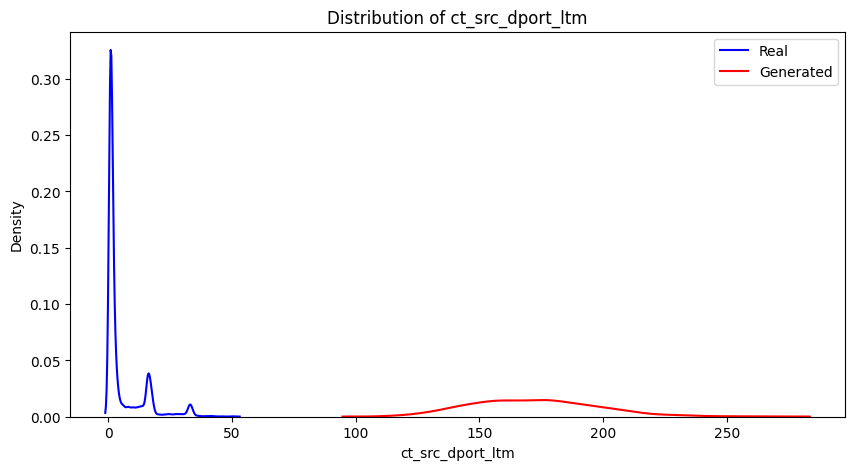

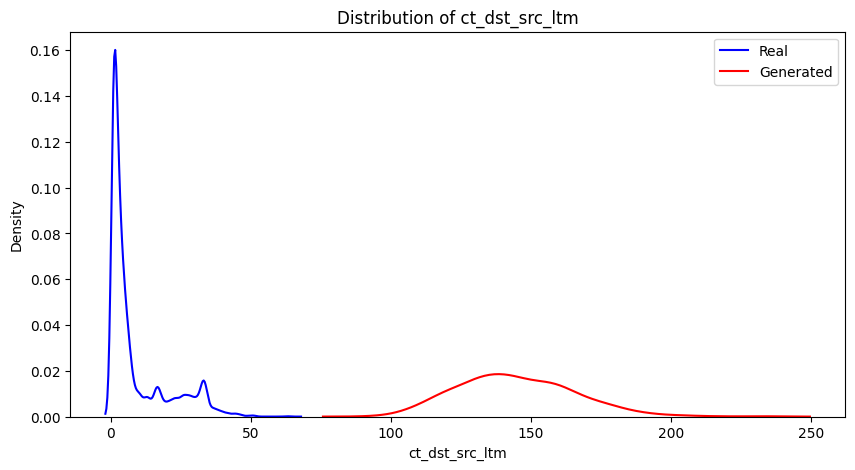

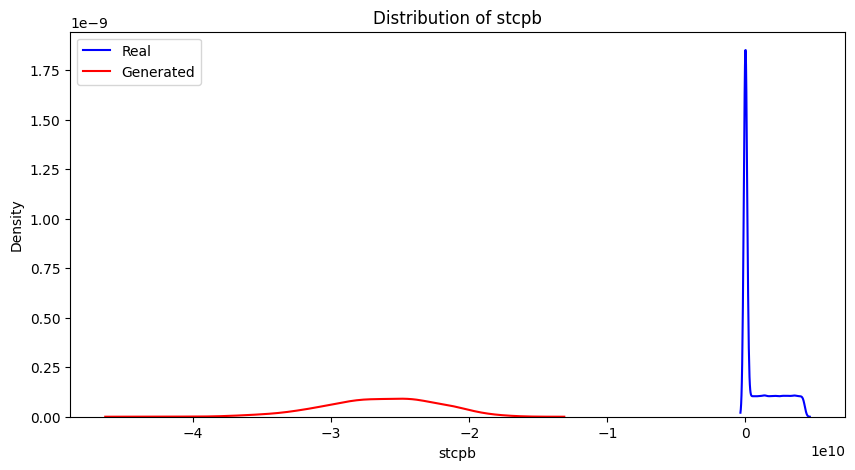

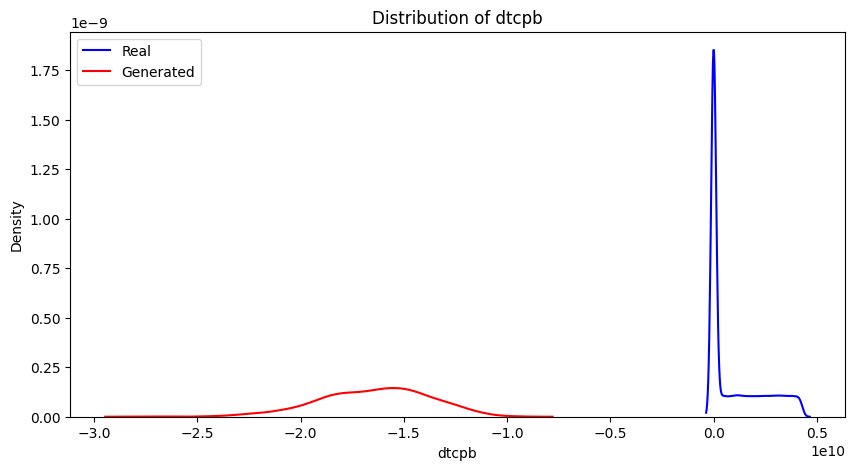

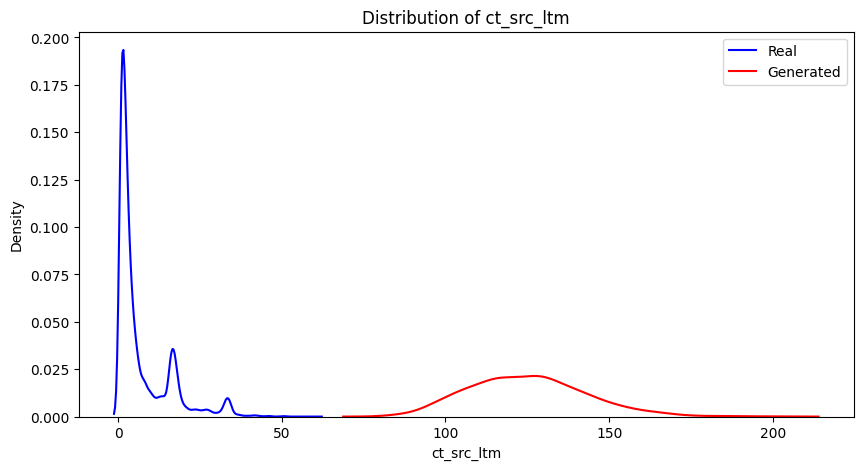

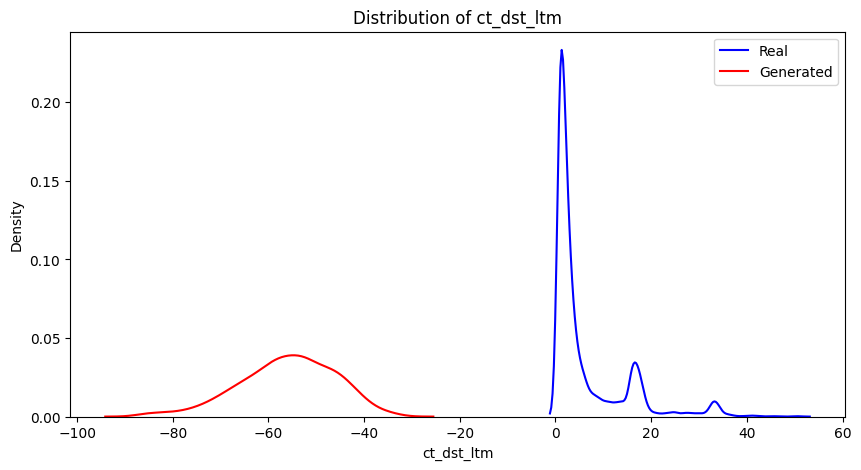

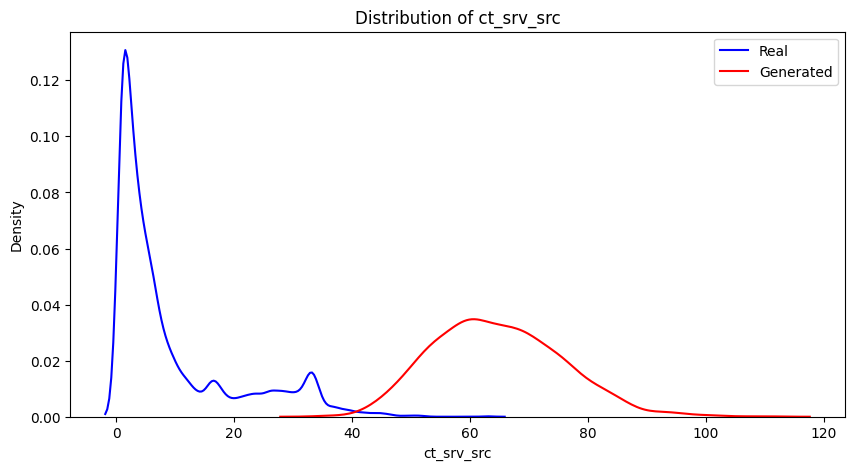

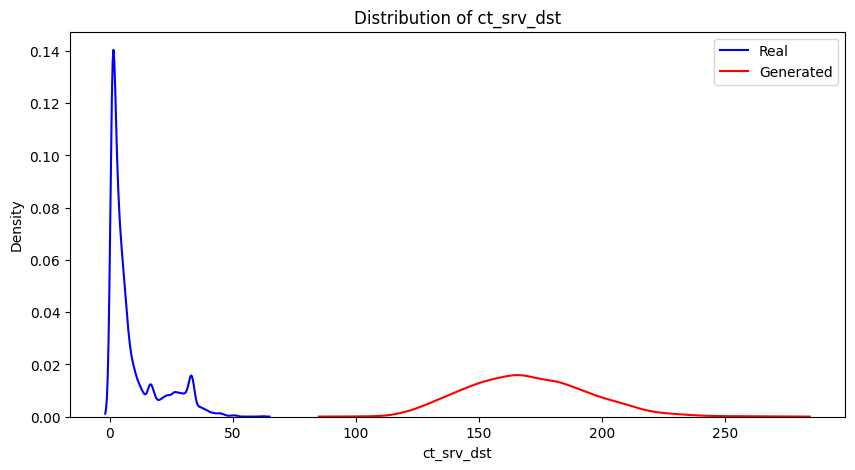

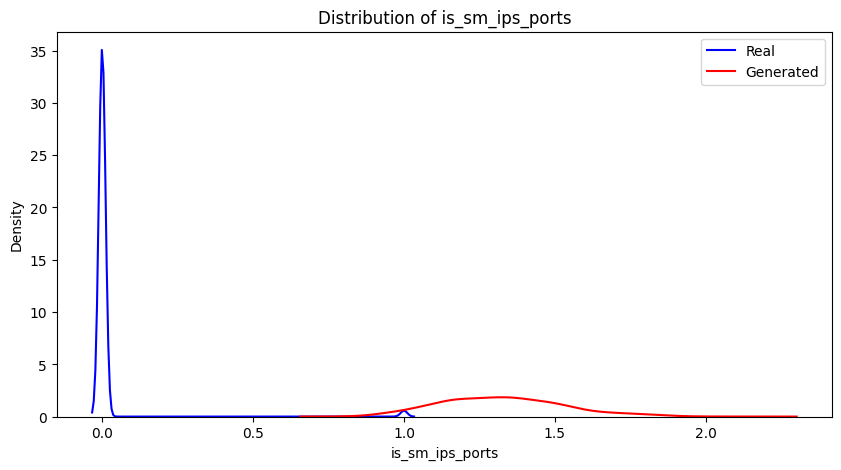

In [11]:
# evaluate the GAN
def evaluate_gan(generator, X_test, latent_dim, n_samples=1000):
    noise = np.random.normal(0, 1, (n_samples, latent_dim))
    generated_data = generator.predict(noise)
    generated_data = scaler.inverse_transform(generated_data)
    generated_df = pd.DataFrame(generated_data, columns=top_features)
    print("Generated Data Sample:\n", generated_df.head())
    # Compare distributions
    for feature in top_features:
        plt.figure(figsize=(10, 5))
        sns.kdeplot(df_train[feature], label='Real', color='blue')
        sns.kdeplot(generated_df[feature], label='Generated', color='red')
        plt.title(f'Distribution of {feature}')
        plt.legend()
        plt.show()

evaluate_gan(generator, X_test, latent_dim, n_samples=1000)

# Save the models
generator.save('generator_model.h5')